In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
!pip install pmdarima==1.8.2

In [7]:
!pip install scikit-learn==0.24

In [8]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Karnataka1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,13,0,0,0,13,0,0,0,0,0,0,0
1,2000,1,1,1,0,14,0,0,0,13,0,0,0,0,0,0,0
2,2000,1,1,2,0,15,58,323,109,13,58,63,323,297,0,109,110
3,2000,1,1,3,0,18,108,611,335,14,108,99,611,657,0,335,343
4,2000,1,1,4,0,21,136,749,549,14,136,118,749,790,0,549,554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,20,0,0,0,18,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,18,0,0,0,0,0,0,0
131397,2014,12,31,21,0,19,0,0,0,18,0,0,0,0,0,0,0
131398,2014,12,31,22,0,19,0,0,0,18,0,0,0,0,0,0,0


In [9]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(24)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,13,0,0,0,13,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,14,0,0,0,13,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,15,58,323,109,13,58,63,323,297,0,109,110,2000-01-01 02:00:00
3,2000,1,1,3,0,18,108,611,335,14,108,99,611,657,0,335,343,2000-01-01 03:00:00
4,2000,1,1,4,0,21,136,749,549,14,136,118,749,790,0,549,554,2000-01-01 04:00:00
5,2000,1,1,5,0,23,153,821,718,14,153,129,821,859,0,718,721,2000-01-01 05:00:00
6,2000,1,1,6,0,24,162,856,822,14,162,160,856,861,0,822,825,2000-01-01 06:00:00
7,2000,1,1,7,0,25,164,863,852,14,258,258,677,677,0,798,798,2000-01-01 07:00:00
8,2000,1,1,8,0,25,160,847,804,14,192,192,769,769,0,777,777,2000-01-01 08:00:00
9,2000,1,1,9,0,25,150,803,685,15,150,147,803,819,0,685,693,2000-01-01 09:00:00


In [10]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
X.head(24)

,GHI
Date,
2000-01-01 00:00:00,0
2000-01-01 01:00:00,0
2000-01-01 02:00:00,109
2000-01-01 03:00:00,335
2000-01-01 04:00:00,549
2000-01-01 05:00:00,718
2000-01-01 06:00:00,822
2000-01-01 07:00:00,798
2000-01-01 08:00:00,777


In [11]:
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
X.head(24)

,Date,GHI
0,2000-01-01 08:00:00,777
1,2000-01-01 09:00:00,685
2,2000-01-01 10:00:00,505
3,2000-01-01 11:00:00,286
4,2000-01-01 12:00:00,58
5,2000-01-01 13:00:00,0
6,2000-01-01 14:00:00,0
7,2000-01-01 15:00:00,0
8,2000-01-01 16:00:00,0
9,2000-01-01 17:00:00,0


In [12]:
y=X.resample('D',on='Date').mean()
y

,GHI
Date,
2000-01-01,231.1
2000-01-02,235.1
2000-01-03,228.3
2000-01-04,234.0
2000-01-05,235.3
...,...
2014-12-27,217.0
2014-12-28,161.8
2014-12-29,183.2


In [13]:
X_train=y[:'2011']
X_test=y['2012':]

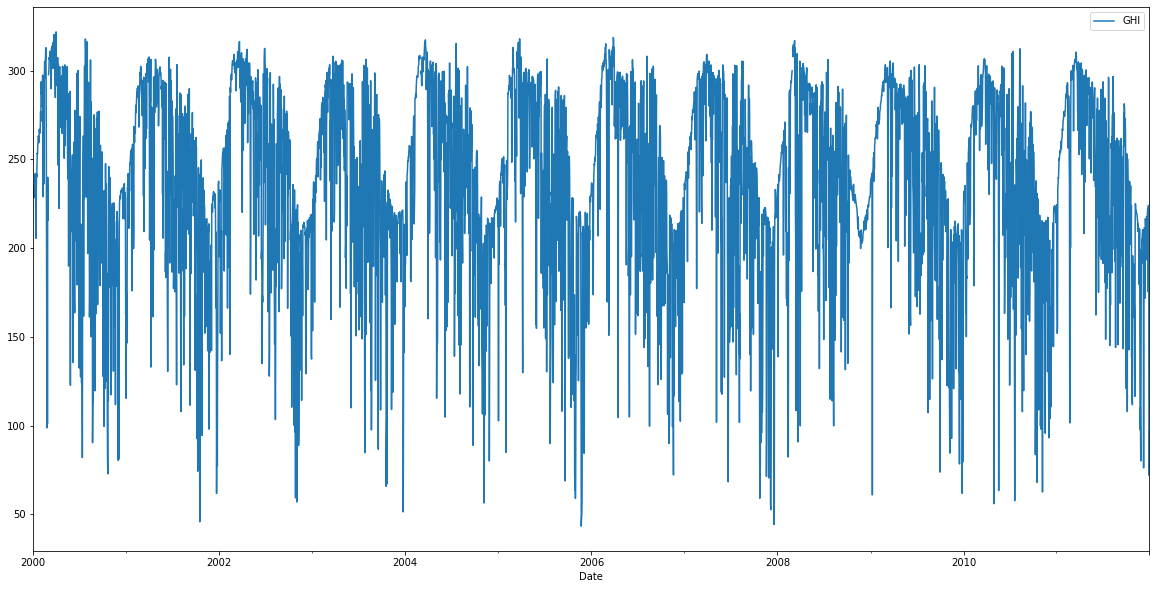

In [14]:
X_train.plot(figsize=(20,10))

In [15]:
TrainDF=pd.DataFrame(X_train)
TrainDF=TrainDF.reset_index()

In [16]:
TrainDF=TrainDF.dropna()
TrainDF=TrainDF.reset_index()

In [17]:
del TrainDF['index']
TrainDF

,Date,GHI
0,2000-01-01,231.1
1,2000-01-02,235.1
2,2000-01-03,228.3
3,2000-01-04,234.0
4,2000-01-05,235.3
...,...,...
4375,2011-12-27,175.3
4376,2011-12-28,224.1
4377,2011-12-29,216.1
4378,2011-12-30,72.1


In [19]:
TrainDataFinal=[]
for i in range(5):
  newFoo=TrainDF[i::5]
  newFoo.set_index('Date',inplace=True)
  TrainDataFinal.append(newFoo)
TrainDataFinal

[              GHI
 Date             
 2000-01-01  231.1
 2000-01-06  236.4
 2000-01-11  207.0
 2000-01-16  247.5
 2000-01-21  263.2
 ...           ...
 2011-12-07  210.4
 2011-12-12  211.6
 2011-12-17  212.7
 2011-12-22  193.3
 2011-12-27  175.3
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-02  235.1
 2000-01-07  240.4
 2000-01-12  205.5
 2000-01-17  253.5
 2000-01-22  262.5
 ...           ...
 2011-12-08  201.6
 2011-12-13  211.1
 2011-12-18  216.7
 2011-12-23  212.8
 2011-12-28  224.1
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-03  228.3
 2000-01-08  241.4
 2000-01-13  230.7
 2000-01-18  252.9
 2000-01-23  259.4
 ...           ...
 2011-12-09   76.2
 2011-12-14  210.6
 2011-12-19  197.3
 2011-12-24  219.2
 2011-12-29  216.1
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-04  234.0
 2000-01-09  242.0
 2000-01-14  241.7
 2000-01-19  258.3
 2000-01-24  262.5
 ...           ...
 2011-12-10  183.3
 2011-12-1

In [20]:
from pmdarima.arima import ARIMA

predictions=[]
for i in range(5):
  stepwise_model = ARIMA(order=(1,1,0),seasonal_order=(1,1,0,73))
  stepwise_model.fit(TrainDataFinal[i])
  print(stepwise_model.summary())
  pred=stepwise_model.predict(n_periods=219)
  predictions.append(pred)
predictions

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  876
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 73)   Log Likelihood               -4454.753
Date:                            Thu, 29 Apr 2021   AIC                           8917.506
Time:                                    15:49:46   BIC                           8936.255
Sample:                                         0   HQIC                          8924.708
                                            - 876                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      2.281      0.011      0.991      -4.445       4.495
ar.L1         -0.4911      0.030   

[array([236.3847555 , 248.89671626, 247.77083477, 268.07175864,
        274.28126744, 266.81618237, 290.17562994, 295.36744266,
        299.01863078, 297.85043125, 283.96456056, 255.26407675,
        309.37814895, 314.36732901, 316.90178946, 318.5005311 ,
        319.68546139, 299.15064434, 311.72378437, 290.56500175,
        309.61805077, 311.50792061, 276.84674265, 306.72358766,
        286.37489133, 301.15653516, 297.69986522, 278.67679215,
        266.89433395, 298.24538268, 290.13934085, 199.32594958,
        236.6429876 , 200.69499903, 261.871053  , 292.09960849,
        279.6333396 , 248.69804171, 312.73135182, 306.21771215,
        229.83174836, 250.67186621, 251.5358091 , 254.981772  ,
        301.15832277, 290.8106275 , 198.51860816, 206.31820088,
        239.3366535 , 197.08649812, 198.33433451, 274.71894204,
        234.97237508, 282.93728067, 288.06437665, 231.70879023,
        245.10951125, 232.23714893, 221.33949506, 142.59714102,
        198.44589523, 155.14265173, 169.

In [21]:
results=[]
for j in range(len(predictions[0])):
  for i in range(5):
    results.append(predictions[i][j])
results

[236.38475550166902,
 253.68473764049065,
 224.73379436275837,
 155.44600636961098,
 155.4609347997539,
 248.89671626424723,
 272.70711790997257,
 268.66479684794217,
 159.44162534856872,
 146.26717068172061,
 247.77083477282125,
 232.8430173350776,
 250.10378710051504,
 169.88162675828994,
 189.6812206909581,
 268.07175863896333,
 275.86126317757544,
 273.4046176031165,
 174.84088032782955,
 201.1083652973542,
 274.2812674367555,
 295.3886764790989,
 293.5008072624082,
 215.30712462767917,
 188.5370473843436,
 266.8161823663182,
 279.5599265359143,
 280.605821214184,
 216.6520945407273,
 219.0612540904144,
 290.1756299381077,
 306.6364144299578,
 304.55880292530026,
 223.88656232903529,
 224.11065598098276,
 295.36744266144933,
 316.51751051311135,
 313.2970990853009,
 233.17074148905857,
 229.42891894708237,
 299.0186307754491,
 269.6486578836282,
 311.5664483049599,
 235.39209756327438,
 232.22758023517184,
 297.8504312548964,
 307.4518179372254,
 319.5954149713714,
 224.01495996092

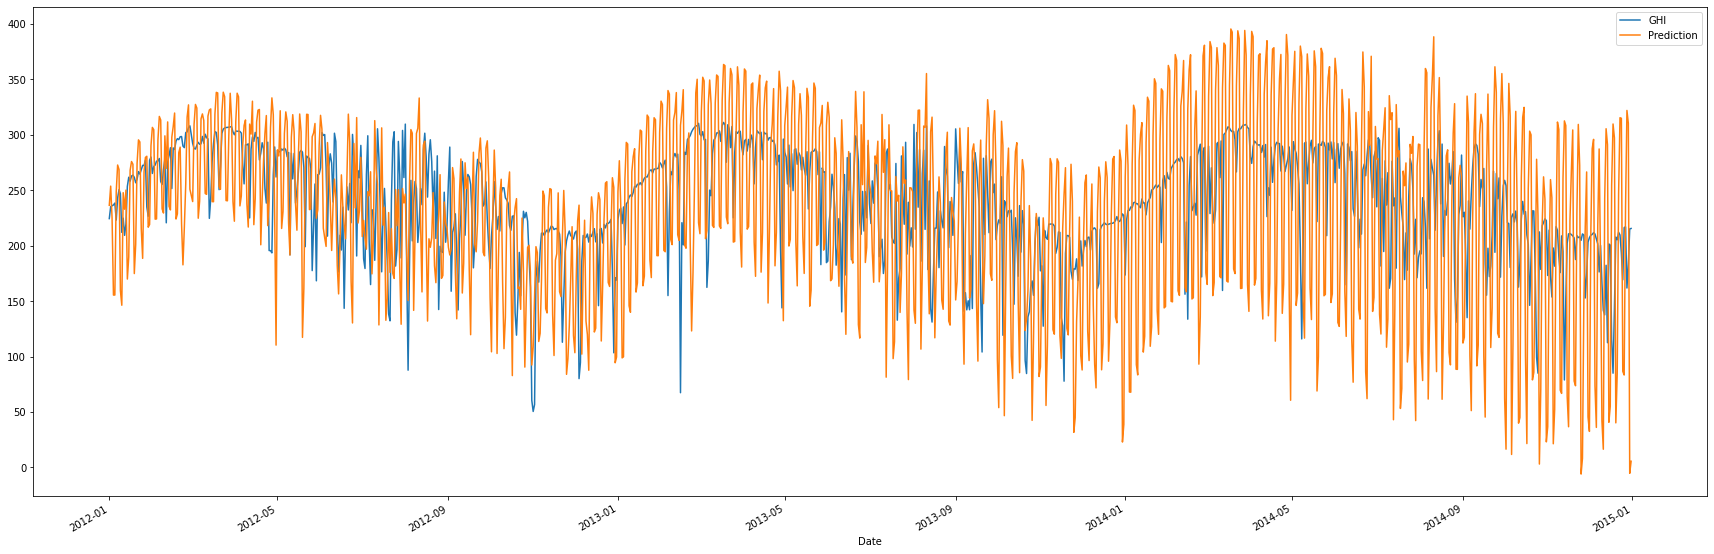

In [22]:
X_test=X_test.dropna()
Finalresults = pd.DataFrame(results,index = X_test[:1095].index,columns=['Prediction'])
pd.concat([X_test[:1095],Finalresults],axis=1).plot(figsize=(30,10))

In [20]:
len(results)

1095

In [21]:
Finalresults

,Prediction
Date,
2012-01-01,236.384756
2012-01-02,253.684738
2012-01-03,224.733794
2012-01-04,155.446006
2012-01-05,155.460935
...,...
2014-12-27,235.074300
2014-12-28,321.922127
2014-12-29,310.334796


In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test[:1095],Finalresults ,squared=False)

89.0649889839962

In [24]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,Finalresults)

0.3403259710685274

In [26]:
Finalresults.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Karnataka1/SARIMAdaily.csv')